In [1]:
import sys
import os
import numpy as np
import pickle # Thư viện dùng để lưu Model xuống ổ cứng
import matplotlib.pyplot as plt

# Thêm đường dẫn src
sys.path.append(os.path.abspath('../src'))

# Import các class core từ src
from model import MLP
from layers import Dense
from activations import ReLU, Linear
from losses import MSE
from optimizer import SGD

# Cấu hình hiển thị
%matplotlib inline

print("Đã import xong các thư viện và module từ src!")

Đã import xong các thư viện và module từ src!


In [2]:
# Đường dẫn tới thư mục chứa data sạch
processed_dir = os.path.join('..', 'data', 'processed')

print(f"Đang đọc dữ liệu từ: {os.path.abspath(processed_dir)}")

# Load dữ liệu
try:
    X_train = np.load(os.path.join(processed_dir, 'X_train.npy'))
    y_train = np.load(os.path.join(processed_dir, 'y_train.npy'))
    
    print("Load dữ liệu thành công!")
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file dữ liệu. Hãy chạy Notebook 02 trước!")

Đang đọc dữ liệu từ: /home/bush/Personal/Github/mlp-california-housing-price-prediction/data/processed
Load dữ liệu thành công!
X_train shape: (16346, 13)
y_train shape: (16346, 1)


In [3]:
# [CELL 3] - CẬP NHẬT CẤU TRÚC CHAMPION
n_features = X_train.shape[1]
model = MLP()

# === KIẾN TRÚC 3 LỚP (Winner Kịch bản 3) ===
model.add(Dense(n_features, 64))
model.add(ReLU())
model.add(Dense(64, 32))
model.add(ReLU())
model.add(Dense(32, 16))  # Lớp sâu giúp học tốt hơn
model.add(ReLU())
model.add(Dense(16, 1))
model.add(Linear())

# === LEARNING RATE (Winner Kịch bản 1) ===
# Dùng 0.001 cho an toàn và ổn định
learning_rate=0.001
model.compile(loss_function=MSE(), optimizer=SGD(learning_rate=0.001))

In [4]:
epochs = 100
batch_size = 16
losses = []

print(f"🚀 Bắt đầu train trong {epochs} epochs...")

for epoch in range(epochs):
    epoch_loss = 0
    
    # === Xáo trộn dữ liệu đầu mỗi Epoch ===
    # 1. Tạo danh sách index ngẫu nhiên
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    
    # 2. Sắp xếp lại X_train và y_train theo thứ tự ngẫu nhiên này
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]
    
    # Chia dữ liệu thành các batch nhỏ
    for i in range(0, len(X_train), batch_size):
        # Lấy batch từ dữ liệu ĐÃ XÁO TRỘN
        x_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        
        # Train Step
        loss = model.train_step(x_batch, y_batch)
        epoch_loss += loss
    
    # Tính loss trung bình
    avg_loss = epoch_loss / (len(X_train) / batch_size)
    losses.append(avg_loss)
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Loss (MSE): {avg_loss:.5f}")

print("🎉 Training hoàn tất!")

🚀 Bắt đầu train trong 100 epochs...
Epoch 10/100 - Loss (MSE): 0.36402
Epoch 20/100 - Loss (MSE): 0.33059
Epoch 30/100 - Loss (MSE): 0.31466
Epoch 40/100 - Loss (MSE): 0.30456
Epoch 50/100 - Loss (MSE): 0.29683
Epoch 60/100 - Loss (MSE): 0.28984
Epoch 70/100 - Loss (MSE): 0.28422
Epoch 80/100 - Loss (MSE): 0.27908
Epoch 90/100 - Loss (MSE): 0.27497
Epoch 100/100 - Loss (MSE): 0.27106
🎉 Training hoàn tất!


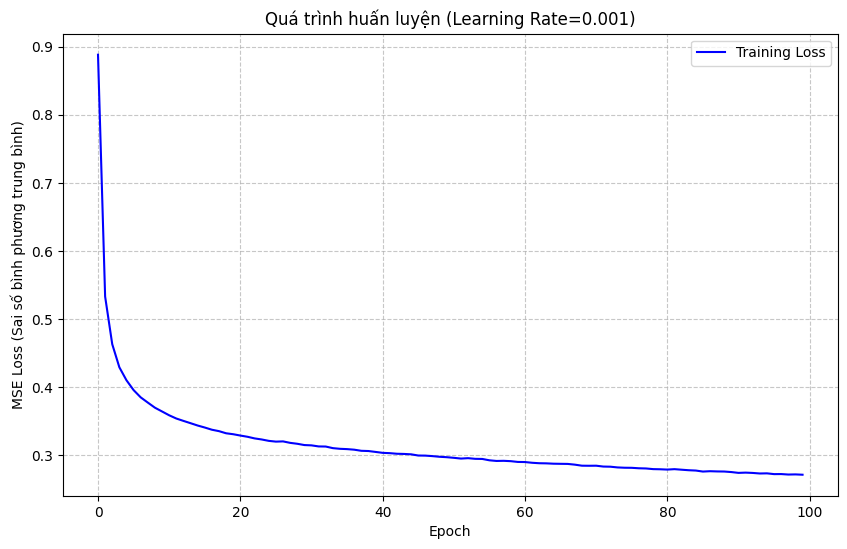

Loss khởi điểm: 0.8884
Loss kết thúc: 0.2711
Đánh giá: Model ĐANG HỌC tốt (Loss giảm dần).


In [5]:
plt.figure(figsize=(10, 6))
plt.plot(losses, label='Training Loss', color='blue')
plt.title(f"Quá trình huấn luyện (Learning Rate={learning_rate})")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss (Sai số bình phương trung bình)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Nhận xét nhanh
print(f"Loss khởi điểm: {losses[0]:.4f}")
print(f"Loss kết thúc: {losses[-1]:.4f}")
if losses[-1] < losses[0]:
    print("Đánh giá: Model ĐANG HỌC tốt (Loss giảm dần).")
else:
    print("Đánh giá: Model KHÔNG HỌC (Loss không giảm). Cần kiểm tra lại code hoặc Learning Rate.")

In [6]:
# Tạo thư mục models nếu chưa có
models_dir = os.path.join('..', 'models')
os.makedirs(models_dir, exist_ok=True)

# Đường dẫn file model
model_path = os.path.join(models_dir, 'mlp_model.pkl')

# Lưu object model vào file
with open(model_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Đã lưu model thành công tại: {os.path.abspath(model_path)}")

Đã lưu model thành công tại: /home/bush/Personal/Github/mlp-california-housing-price-prediction/models/mlp_model.pkl
